In [1]:
import numpy as np # for algebra
import pandas as pd # manipulating data
import matplotlib.pyplot as plt # plotting and visualization
from sklearn.model_selection import train_test_split # creating train and test sets
from sklearn.svm import SVC # our classifier 
from sklearn.metrics import confusion_matrix # Evaluating metric
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv') # read data into pandas dataframe
df.head() # displaying the first 5 examples

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.drop('label',axis = 1) # our features
Y = df.label # Our target

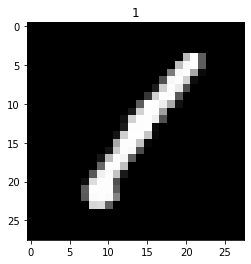

In [4]:
def plot_digit(idx,data = X,labels = Y):
    '''
    display the idx digit in 'data' set with its label in target 'labels' 
    '''
    img = data.iloc[idx].values # get the idx example in dataset
    img = img.reshape((28,28)) # reshape it to 28*28 matrix
    plt.imshow(img,cmap='gray') # show the digit 
    plt.title(labels.iloc[idx]) # set the title
    plt.show()
plot_digit(0)    

In [5]:
print(f'We have {X.shape[0]} example')

We have 42000 example


In [6]:
n_tr = 35000 # N of examples to train and validate our classifer with
train_data,train_labels = (X.iloc[:n_tr,:],Y.iloc[:n_tr]) # training data and target
test_data,test_labels = (X.iloc[n_tr:,:],Y.iloc[n_tr:]) # test data and target

In [7]:
x_train,x_dev,y_train,y_dev = train_test_split(train_data,train_labels,
                        test_size=0.2, 
                        random_state=42,
                        shuffle = False) # spliting out train data to train set and dev set
print(f'We have {x_train.shape[0]} example for train')
print(f'We have {x_dev.shape[0]} example for development')
print(f'We have {test_data.shape[0]} example for test')

We have 28000 example for train
We have 7000 example for development
We have 7000 example for test


In [8]:
svc = SVC(C=10,random_state=42) # initalize our RandomForestClassifier
svc.fit(x_train,y_train) # fit the classifier on train set
y_pred = svc.predict(x_dev)
svc.score(x_dev,y_dev) # the accuracy on dev set

0.9802857142857143

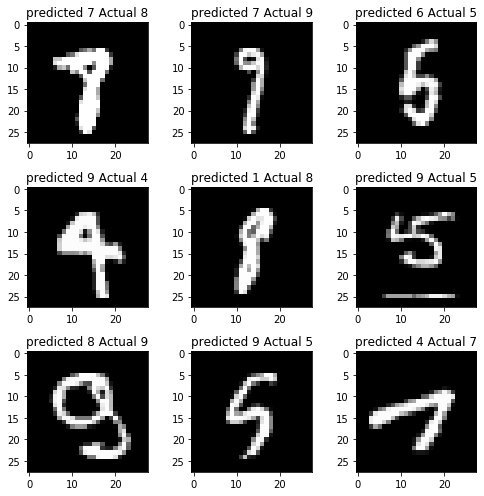

In [9]:
plt.figure(figsize=(7,7))
z=1
for i in range(len(y_dev.values)):
    plt.subplot(3,3,z)
    if y_dev.values[i] != y_pred[i]:
        z+=1
        plt.imshow(x_dev.values[i].reshape((28,28)),cmap='gray')
        plt.title(f'predicted {y_pred[i]} Actual {y_dev.values[i]}')
        if z == 10: break
plt.tight_layout()        
plt.show()

In [10]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_dev, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[691   0   0   0   0   1   1   0   1   1]
 [  0 792   2   0   0   0   0   2   0   0]
 [  3   0 671   0   1   0   1   2   2   2]
 [  2   0   6 694   0   2   0   5   3   1]
 [  1   1   1   0 597   0   3   1   0   7]
 [  1   0   1   6   0 659   3   0   0   4]
 [  5   0   1   0   0   4 636   0   1   0]
 [  1   0   2   0   3   0   0 745   0   7]
 [  1   3   1   1   1   3   4   2 664   2]
 [  1   2   0   4   7   4   0   8   3 713]]


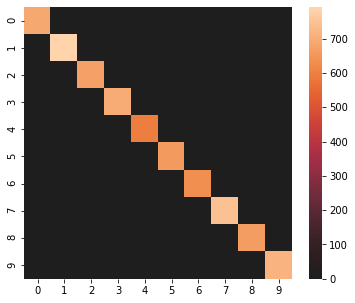

In [11]:
# drawing confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(CM, center = True)
plt.show()

In [12]:
svc.score(test_data,test_labels)

0.9781428571428571

In [13]:
td = pd.read_csv('test.csv')
results=svc.predict(td)

In [14]:
df_t = pd.DataFrame(results)
df_t.index.name='ImageId'
df_t.index+=1
df_t.columns=['Label']
df_t.to_csv('results.csv', header=True)